In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
df.head()



,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


### EDA

In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes
None
       Chirps/Second  Ground Temperature
count      15.000000           15.000000
mean       16.566667           79.346667
std         1.712837            7.020467
min        14.400000           69.400000
25%        15.450000           73.400000
50%        16.000000           80.600000
75%        17.150000           83.400000
max        20.000000           93.300000
Chirps/Second         0
Ground Temperature    0
dtype: int64


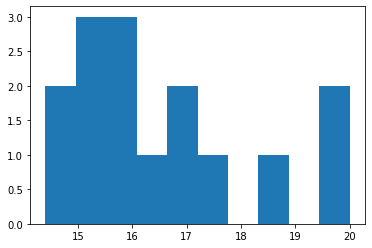

In [5]:
x = df["Chirps/Second"]
plt.hist(x, bins=10)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


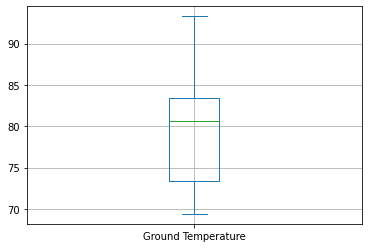

In [6]:
print(df["Ground Temperature"].plot.box(grid='True'))

In [7]:
df.shape

(15, 2)

In [8]:
#Checkign for outliers  
q3, q1 = np.percentile(df["Chirps/Second"], [75 ,25])
print(df[df["Chirps/Second"] > q3])
print(df[df["Chirps/Second"] < q1])


    Chirps/Second  Ground Temperature
0            20.0                88.6
2            19.8                93.3
3            18.4                84.3
11           17.2                82.6
    Chirps/Second  Ground Temperature
6            14.7                69.7
8            15.4                69.4
10           15.0                79.6
14           14.4                76.3


### Model Building 


In [9]:
#Creating a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df['Ground Temperature'].values.reshape(-1,1)
Y = df['Chirps/Second'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
print("Model Intercept:{} and Coefficients:{}".format(model.intercept_, model.coef_))
str1="The linear equation for the data is y={} *x +{}".format(model.intercept_, model.coef_)
print(str1)

Model Intercept:[0.45931465] and Coefficients:[[0.20299973]]
The linear equation for the data is y=[0.45931465] *x +[[0.20299973]]


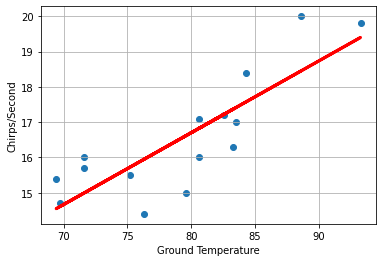

In [10]:
# Q2) Plotting the original data and the regression line
plt.scatter(X,Y)
plt.plot(X, model.predict(X), color="red", linewidth=3)
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.grid()
plt.show()

In [11]:
# Q3) Generating R2 Score 
model.score(X,Y)

0.6922946529147004

In [12]:
# Q4) Predict  crickets to be chirping at ground temperature of 95?
model.predict([[95]]) 

array([[19.74428913]])

In [13]:
# Q5) Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 
temp = (18 - 0.45931465)/0.20299973 
temp

86.40743192121488

## Conclusion 
With the available data we can conclude that there is some positive linear relation between the ground temperatures and chirp frequency, but the R2 score is just 0.69 thus which is not sufficient to establish a strong correlation


## ===============================================================

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [14]:
df = pd.read_fwf("brain_body.txt")
print(df.head())

     Brain   Body
0    3.385   44.5
1    0.480   15.5
2    1.350    8.1
3  465.000  423.0
4   36.330  119.5


In [15]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(62, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB
None
             Brain         Body
count    62.000000    62.000000
mean    198.789984   283.134194
std     899.158011   930.278942
min       0.005000     0.140000
25%       0.600000     4.250000
50%       3.342500    17.250000
75%      48.202500   166.000000
max    6654.000000  5712.000000
Brain    0
Body     0
dtype: int64


### EDA

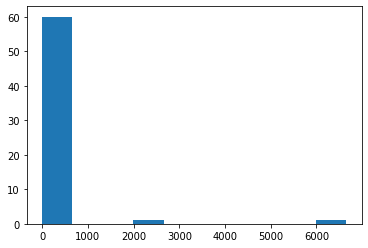

In [16]:
x = df["Brain"]
plt.hist(x, bins=10)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


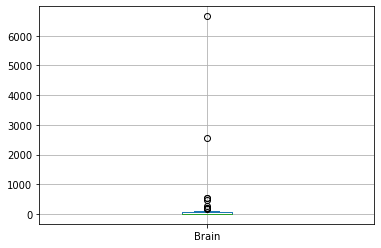

In [17]:
print(df["Brain"].plot.box(grid='True'))

In [18]:
Q3 = np.quantile(df["Brain"], 0.75)
Q1 = np.quantile(df["Brain"], 0.25)
IQR = Q3 - Q1
print("IQR =", IQR)
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
print(df[df["Brain"] < lower_range].count())
print("="*5)
print(df[df["Brain"] > upper_range].count())

IQR = 47.6025
Brain    0
Body     0
dtype: int64
=====
Brain    10
Body     10
dtype: int64


In [19]:
#Creating a linear regression model with outliers 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df['Brain'].values.reshape(-1,1)
Y = df['Body'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
print("Model Intercept:{} and Coefficients:{}".format(model.intercept_, model.coef_))
str2="The linear equation for the data is y={} *x +{}".format(model.intercept_, model.coef_)
print(str2)

Model Intercept:[91.00439621] and Coefficients:[[0.96649637]]
The linear equation for the data is y=[91.00439621] *x +[[0.96649637]]


In [20]:
# Q3) Generating R2 Score 
model.score(X,Y)

0.8726620843043331

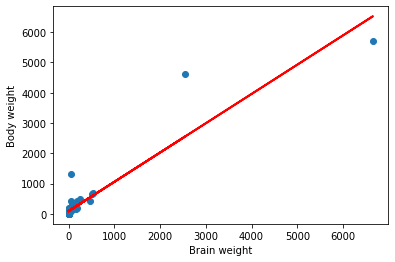

In [21]:
plt.scatter(X,Y)
plt.plot(X, model.predict(X), color="red", linewidth=2)
plt.xlabel("Brain weight")
plt.ylabel("Body weight")
plt.show()

## Conclusion

With the R2 score of 0.87 shows a strong correlation between Brain Weight and Body Weight. 

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [23]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [24]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(52, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB
None
             Sex       Rank       Year     Degree      YSdeg        Salary
count  52.000000  52.000000  52.000000  52.000000  52.000000     52.000000
mean    0.269231   2.038462   7.480769   0.653846  16.115385  23797.653846
std     0.447888   0.862316   5.507536   0.480384  10.222340   5917.289154
min     0.000000   1.000000   0.000000   0.000000   1.000000  15000.000000
25%     0.000000   1.000000   3.000000   0.000000   6.750000  18246.750000
50%     0.000000   2.000000   7.000000   1.000000  15.500000  23719.000000
75%     1.000000   3.000000  11.000000   1

In [25]:
X = ['Sex','Rank','Year','Degree','YSdeg']
Y = 'Salary'

In [26]:
for i in df.columns:
    print(i)

Sex
Rank
Year
Degree
YSdeg
Salary


In [27]:
# Model Builing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df.iloc[:,:5]
Y = df.iloc[:,5]
model = LinearRegression()
model.fit(X,Y)
print("Model Intercept:{} and Coefficients:{}".format(model.intercept_, model.coef_))

str2="The linear equation for the data is Salary="
j=0
for i in df.iloc[:,:5]:
    str2+=i+" * "+ str((model.coef_[j]))+" + "
    j+=1
str2+=" "+ str(model.intercept_)
print(str2)
                    

Model Intercept:11410.146547255616 and Coefficients:[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]
The linear equation for the data is Salary=Sex * 1241.7924996014265 + Rank * 5586.181449521438 + Year * 482.85976782882153 + Degree * -1331.6440634059095 + YSdeg * -128.79057354486258 +  11410.146547255616


In [28]:
# Q3) Generating R2 Score 
model.score(X,Y)

0.8547180674410969

In [29]:
from itertools import combinations
cols = [x for x in df.columns if x != 'Salary']
Y = df['Salary']
fit_d = {}
for i in range(1, len(cols)+1):
    for comb in combinations(cols, i):
        X = df[list(comb)]
        # X = sm.add_constant(X)
        model.fit(X,Y)
        fit_d[comb] = model.score(X,Y)

key_max = max(fit_d, key=fit_d.get)

fit_d

{('Sex',): 0.06389892583288004,
 ('Rank',): 0.7525360539274631,
 ('Year',): 0.49093702676921624,
 ('Degree',): 0.004861680984748484,
 ('YSdeg',): 0.45542813458360276,
 ('Sex', 'Rank'): 0.7554917749443394,
 ('Sex', 'Year'): 0.4911360941886388,
 ('Sex', 'Degree'): 0.06643739842018881,
 ('Sex', 'YSdeg'): 0.4930479271966782,
 ('Rank', 'Year'): 0.8436480933264597,
 ('Rank', 'Degree'): 0.7557961688386643,
 ('Rank', 'YSdeg'): 0.7623948189698249,
 ('Year', 'Degree'): 0.4919014149016441,
 ('Year', 'YSdeg'): 0.5782019226431887,
 ('Degree', 'YSdeg'): 0.5409662288237875,
 ('Sex', 'Rank', 'Year'): 0.8454319861987166,
 ('Sex', 'Rank', 'Degree'): 0.7583144768153612,
 ('Sex', 'Rank', 'YSdeg'): 0.7666122610227071,
 ('Sex', 'Year', 'Degree'): 0.49207944757472966,
 ('Sex', 'Year', 'YSdeg'): 0.5808063918180406,
 ('Sex', 'Degree', 'YSdeg'): 0.5832708257660315,
 ('Rank', 'Year', 'Degree'): 0.8437395200874137,
 ('Rank', 'Year', 'YSdeg'): 0.8456725764485596,
 ('Rank', 'Degree', 'YSdeg'): 0.7625149185326454,
 

In [30]:
 dict(sorted(fit_d.items(), key=lambda item: item[1]))

{('Degree',): 0.004861680984748484,
 ('Sex',): 0.06389892583288004,
 ('Sex', 'Degree'): 0.06643739842018881,
 ('YSdeg',): 0.45542813458360276,
 ('Year',): 0.49093702676921624,
 ('Sex', 'Year'): 0.4911360941886388,
 ('Year', 'Degree'): 0.4919014149016441,
 ('Sex', 'Year', 'Degree'): 0.49207944757472966,
 ('Sex', 'YSdeg'): 0.4930479271966782,
 ('Degree', 'YSdeg'): 0.5409662288237875,
 ('Year', 'YSdeg'): 0.5782019226431887,
 ('Sex', 'Year', 'YSdeg'): 0.5808063918180406,
 ('Sex', 'Degree', 'YSdeg'): 0.5832708257660315,
 ('Year', 'Degree', 'YSdeg'): 0.6236261611533503,
 ('Sex', 'Year', 'Degree', 'YSdeg'): 0.6311597502907434,
 ('Rank',): 0.7525360539274631,
 ('Sex', 'Rank'): 0.7554917749443394,
 ('Rank', 'Degree'): 0.7557961688386643,
 ('Sex', 'Rank', 'Degree'): 0.7583144768153612,
 ('Rank', 'YSdeg'): 0.7623948189698249,
 ('Rank', 'Degree', 'YSdeg'): 0.7625149185326454,
 ('Sex', 'Rank', 'YSdeg'): 0.7666122610227071,
 ('Sex', 'Rank', 'Degree', 'YSdeg'): 0.7671813414350668,
 ('Rank', 'Year'): 

### Conclusion 
From the above output, we can conclude taht the model with all the features gives the best R2 score, thus making the best feature combination. 


In [35]:
# Q3) Report whether sex is a factor in salary.

from itertools import combinations
cols = [x for x in df.columns if x not in ['Salary','Sex']]
Y = df['Salary']
fit_d = {}
for i in range(1, len(cols)+1):
    for comb in combinations(cols, i):
        X = df[list(comb)]
        # X = sm.add_constant(X)
        model.fit(X,Y)
        fit_d[comb] = model.score(X,Y)

key_max = max(fit_d, key=fit_d.get)

fit_d

{('Rank',): 0.7525360539274631,
 ('Year',): 0.49093702676921624,
 ('Degree',): 0.004861680984748484,
 ('YSdeg',): 0.45542813458360276,
 ('Rank', 'Year'): 0.8436480933264597,
 ('Rank', 'Degree'): 0.7557961688386643,
 ('Rank', 'YSdeg'): 0.7623948189698249,
 ('Year', 'Degree'): 0.4919014149016441,
 ('Year', 'YSdeg'): 0.5782019226431887,
 ('Degree', 'YSdeg'): 0.5409662288237875,
 ('Rank', 'Year', 'Degree'): 0.8437395200874137,
 ('Rank', 'Year', 'YSdeg'): 0.8456725764485596,
 ('Rank', 'Degree', 'YSdeg'): 0.7625149185326454,
 ('Year', 'Degree', 'YSdeg'): 0.6236261611533503,
 ('Rank', 'Year', 'Degree', 'YSdeg'): 0.8485077204335425}

In [36]:
 dict(sorted(fit_d.items(), key=lambda item: item[1]))

{('Degree',): 0.004861680984748484,
 ('YSdeg',): 0.45542813458360276,
 ('Year',): 0.49093702676921624,
 ('Year', 'Degree'): 0.4919014149016441,
 ('Degree', 'YSdeg'): 0.5409662288237875,
 ('Year', 'YSdeg'): 0.5782019226431887,
 ('Year', 'Degree', 'YSdeg'): 0.6236261611533503,
 ('Rank',): 0.7525360539274631,
 ('Rank', 'Degree'): 0.7557961688386643,
 ('Rank', 'YSdeg'): 0.7623948189698249,
 ('Rank', 'Degree', 'YSdeg'): 0.7625149185326454,
 ('Rank', 'Year'): 0.8436480933264597,
 ('Rank', 'Year', 'Degree'): 0.8437395200874137,
 ('Rank', 'Year', 'YSdeg'): 0.8456725764485596,
 ('Rank', 'Year', 'Degree', 'YSdeg'): 0.8485077204335425}

In [37]:
df['Sex'].value_counts()

0    38
1    14
Name: Sex, dtype: int64

In [42]:
df2=df.copy()
#remove one gender and run model 
df2.drop(df.loc[df['Sex'] == 1].index, axis=0, inplace=True)


In [45]:
from itertools import combinations
cols = [x for x in df2.columns if x not in ['Salary']]
Y = df2['Salary']
fit_d = {}
for i in range(1, len(cols)+1):
    for comb in combinations(cols, i):
        X = df2[list(comb)]
        # X = sm.add_constant(X)
        model.fit(X,Y)
        fit_d[comb] = model.score(X,Y)

key_max = max(fit_d, key=fit_d.get)
dict(sorted(fit_d.items(), key=lambda item: item[1]))

{('Sex',): 0.0,
 ('Sex', 'Degree'): 0.0009041545486969671,
 ('Degree',): 0.0009041545486970781,
 ('YSdeg',): 0.49277923690619496,
 ('Sex', 'YSdeg'): 0.4927792369061951,
 ('Year',): 0.5508554212960585,
 ('Sex', 'Year'): 0.5508554212960585,
 ('Year', 'Degree'): 0.553887985193434,
 ('Sex', 'Year', 'Degree'): 0.553887985193434,
 ('Degree', 'YSdeg'): 0.5689941254644684,
 ('Sex', 'Degree', 'YSdeg'): 0.5689941254644685,
 ('Sex', 'Year', 'YSdeg'): 0.5934417896615585,
 ('Year', 'YSdeg'): 0.5934417896615587,
 ('Year', 'Degree', 'YSdeg'): 0.6261692165941779,
 ('Sex', 'Year', 'Degree', 'YSdeg'): 0.626169216594178,
 ('Rank',): 0.7672694278831863,
 ('Sex', 'Rank'): 0.7672694278831863,
 ('Rank', 'Degree'): 0.7776019823137628,
 ('Sex', 'Rank', 'Degree'): 0.7776019823137628,
 ('Rank', 'YSdeg'): 0.7940910338170332,
 ('Sex', 'Rank', 'YSdeg'): 0.7940910338170333,
 ('Rank', 'Degree', 'YSdeg'): 0.794095409892877,
 ('Sex', 'Rank', 'Degree', 'YSdeg'): 0.794095409892877,
 ('Rank', 'Year'): 0.8707442492188793,


In [48]:
# Remove other gender 
df3=df.copy()
df3.drop(df.loc[df['Sex'] == 0].index, axis=0, inplace=True)


In [49]:
from itertools import combinations
cols = [x for x in df3.columns if x not in ['Salary']]
Y = df3['Salary']
fit_d = {}
for i in range(1, len(cols)+1):
    for comb in combinations(cols, i):
        X = df3[list(comb)]
        # X = sm.add_constant(X)
        model.fit(X,Y)
        fit_d[comb] = model.score(X,Y)

key_max = max(fit_d, key=fit_d.get)
dict(sorted(fit_d.items(), key=lambda item: item[1]))

{('Sex',): 0.0,
 ('Degree',): 0.012617370022798946,
 ('Sex', 'Degree'): 0.012617370022798946,
 ('Year',): 0.23724511682395943,
 ('Sex', 'Year'): 0.23724511682395943,
 ('Year', 'Degree'): 0.2377539808918404,
 ('Sex', 'Year', 'Degree'): 0.2377539808918404,
 ('YSdeg',): 0.40336500685974985,
 ('Sex', 'YSdeg'): 0.40336500685974985,
 ('Year', 'YSdeg'): 0.46284851555561135,
 ('Sex', 'Year', 'YSdeg'): 0.46284851555561146,
 ('Degree', 'YSdeg'): 0.5801084156554466,
 ('Sex', 'Degree', 'YSdeg'): 0.5801084156554468,
 ('Year', 'Degree', 'YSdeg'): 0.615027067555158,
 ('Sex', 'Year', 'Degree', 'YSdeg'): 0.6150270675551581,
 ('Rank',): 0.6741444145659368,
 ('Sex', 'Rank'): 0.6741444145659368,
 ('Sex', 'Rank', 'YSdeg'): 0.6741452723195022,
 ('Rank', 'YSdeg'): 0.6741452723195023,
 ('Rank', 'Degree'): 0.6774359986594283,
 ('Sex', 'Rank', 'Degree'): 0.6774359986594283,
 ('Rank', 'Degree', 'YSdeg'): 0.6845453799339638,
 ('Sex', 'Rank', 'Degree', 'YSdeg'): 0.6845453799339638,
 ('Rank', 'Year'): 0.76460421149

## Conclusion
From the above models it is clear that the maximum values of R2 score is not changing very much with the change in values of Sex Column, thus it can be concluded that Sex does not play a factor in deciding the Salary.
